## Table of contents:

#### 01. Install Quandl library & Importing libraries and data
#### 02. Find & Import Data Set
#### 03. Create a linechart
#### 04. Decompose data components
#### 05. Dickey-Fuller test
#### 06. Round of differencing
#### 07. Autocorrelations

## 01 Install Quandl (nasdaqdatalink) library and import libraries and data

In [2]:
import nasdaqdatalink
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [5]:
# import the data files and assign to a dataframe

# setup path to cleaned dataset
path = r'C:\Users\nicol\Chocolate Bar Analysis'
df_cocoa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [8]:
# importing World Bank Data - Note- this data set will not be used, but is brought in to exercise the API
nasdaqdatalink.ApiConfig.api_key = 'ywGPK4HxcxvewxvbdrpF'
nasdaqdatalink.get_table('WB/DATA',series_id='TX.VAL.FOOD.ZS.UN')

,series_id,country_code,country_name,year,value
None,,,,,
0,TX.VAL.FOOD.ZS.UN,ZWE,Zimbabwe,2022,17.276898
1,TX.VAL.FOOD.ZS.UN,ZWE,Zimbabwe,2021,15.882183
2,TX.VAL.FOOD.ZS.UN,ZWE,Zimbabwe,2020,21.996472
3,TX.VAL.FOOD.ZS.UN,ZWE,Zimbabwe,2019,23.452997
4,TX.VAL.FOOD.ZS.UN,ZWE,Zimbabwe,2018,25.751928
...,...,...,...,...,...
9925,TX.VAL.FOOD.ZS.UN,ABW,Aruba,1995,35.834331
9926,TX.VAL.FOOD.ZS.UN,ABW,Aruba,1991,18.063438
9927,TX.VAL.FOOD.ZS.UN,ABW,Aruba,1990,42.579272


In [36]:
# create a new aggregate dataset by year and average rating 
avg_rating = df_cocoa.groupby(['Review Date'])['Rating'].mean()
avg_rating.head(20)

Review Date
2006    3.125000
2007    3.162338
2008    2.994624
2009    3.073171
2010    3.148649
2011    3.256061
2012    3.178205
2013    3.197011
2014    3.189271
2015    3.246491
2016    3.226027
2017    3.312500
Name: Rating, dtype: float64

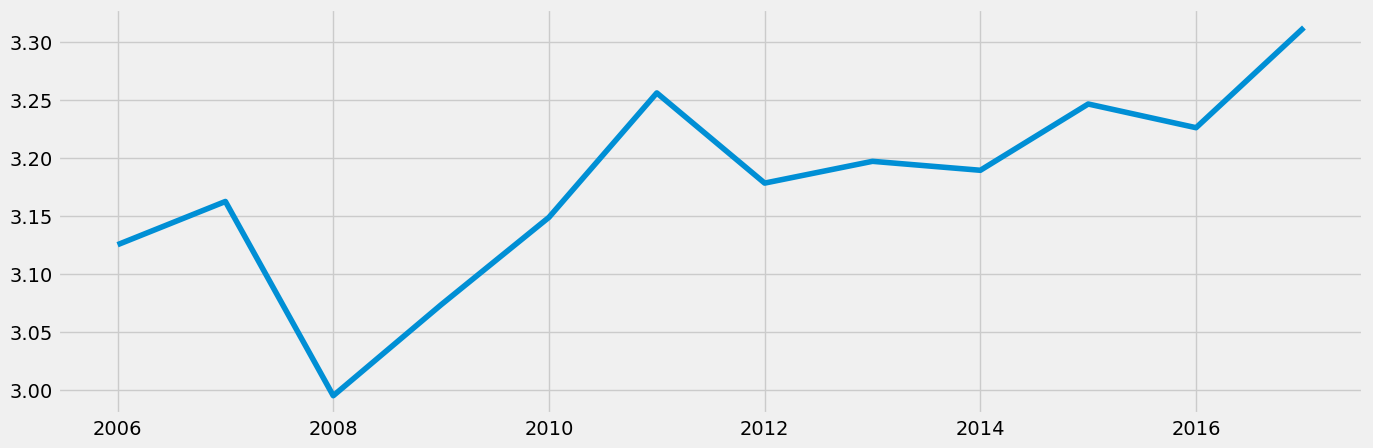

In [37]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(avg_rating)

In [42]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(avg_rating, model='additive', period=1)

In [43]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

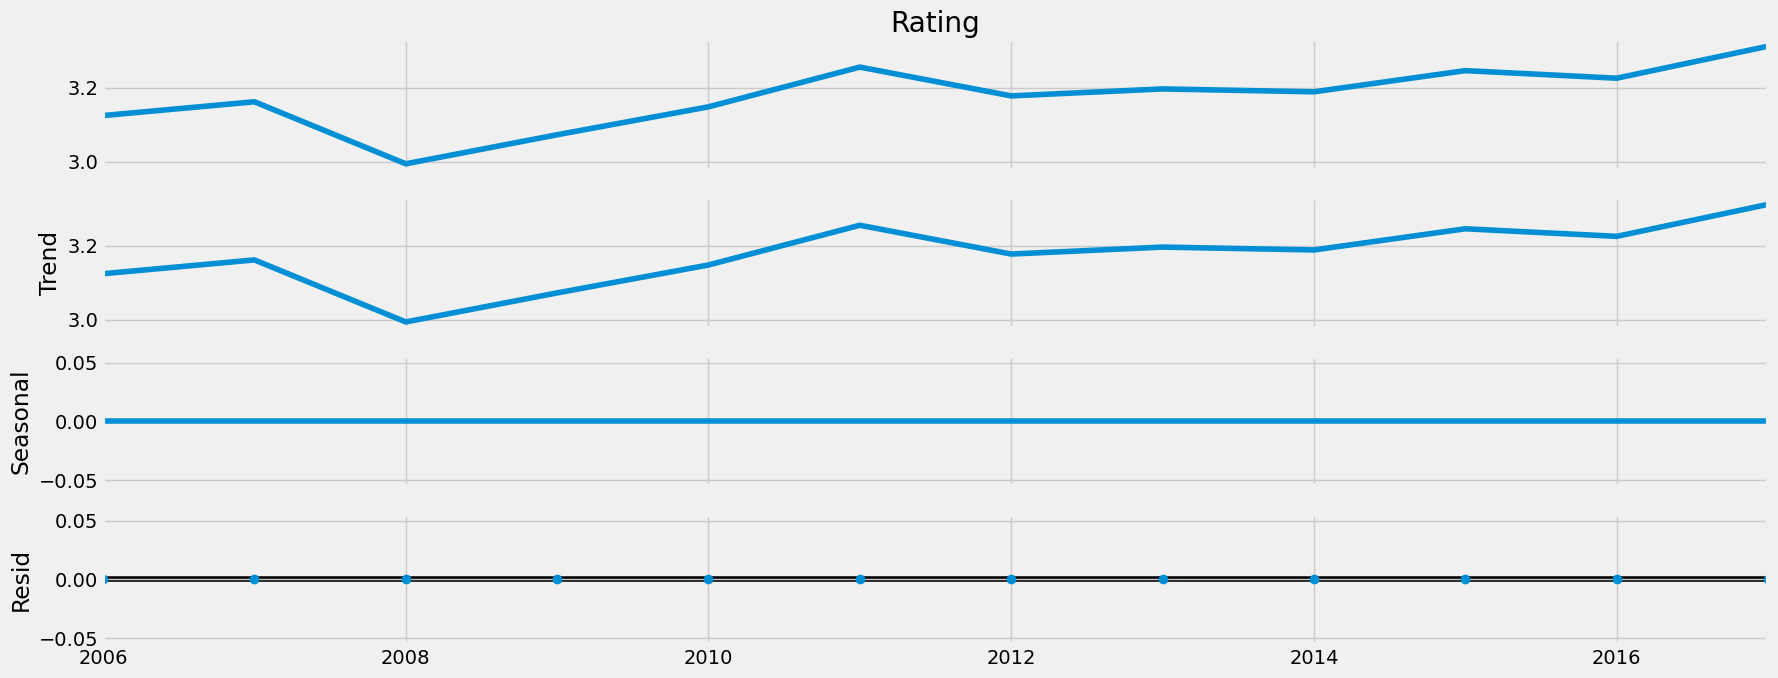

In [44]:
# Plot separate components

decomposition.plot()
plt.show()

There is an upward trend in the line graph indictating the average rating grew over time.

In [46]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(avg_rating)

Dickey-Fuller Stationarity test:
Test Statistic                -1.237766
p-value                        0.657142
Number of Lags Used            3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


The hypothesis was that the higher the Cocoa Percentage, the lower the average rating.
if the trend holds over time, the cocoa percentage would be lower on average.

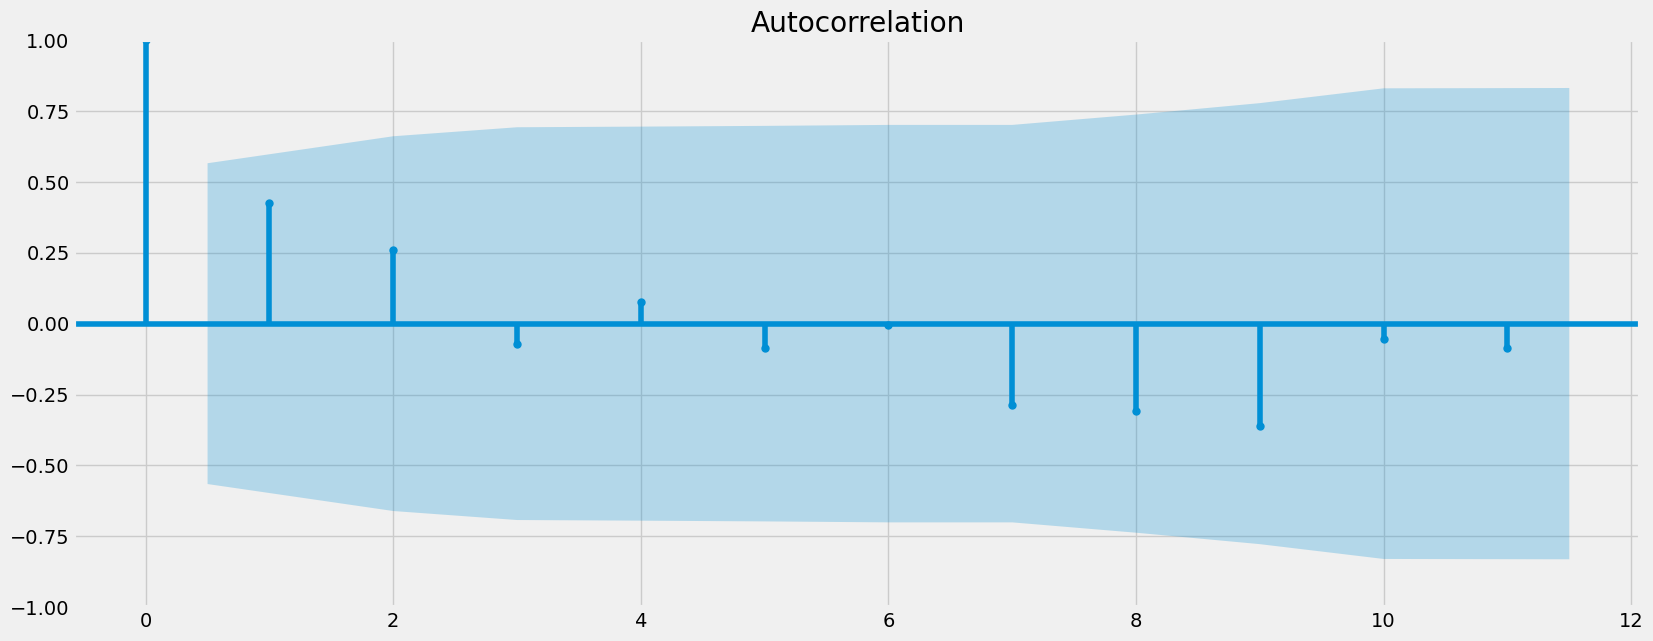

In [48]:
# Check out the plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(avg_rating)
plt.show()

The dataset doesn't appear to require another round of differencing.